Found 1740 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


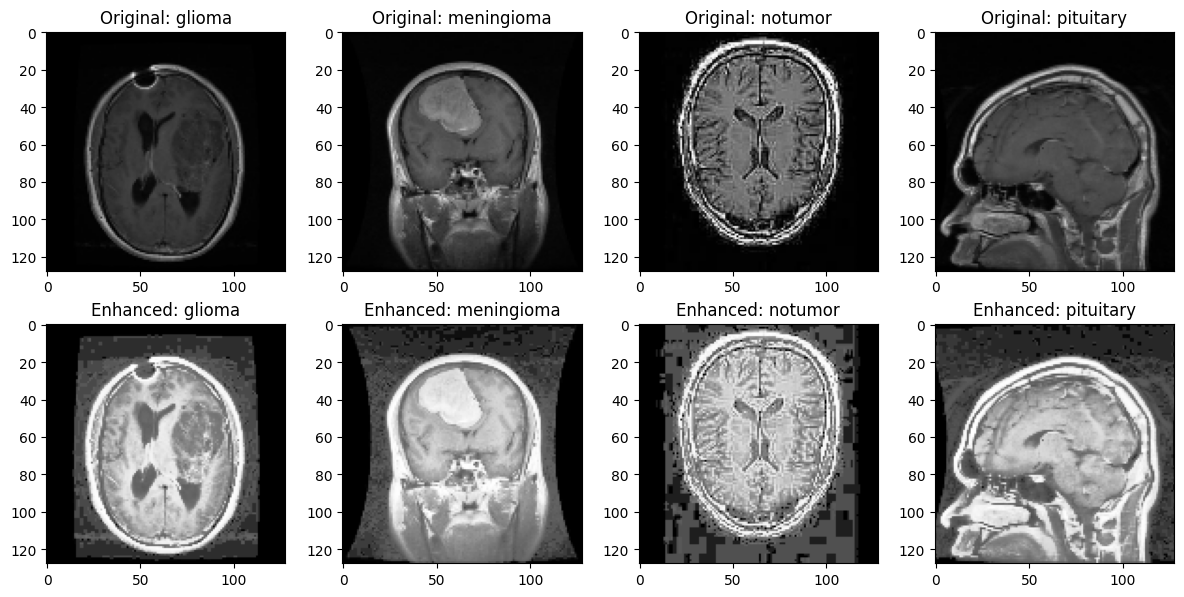

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset" 
# Define class labels
class_labels = {"glioma": 0, "meningioma": 1, "notumor": 2, "pituitary": 3}

# Image preprocessing parameters
IMG_SIZE = (128, 128)  # Resize to 128x128
BATCH_SIZE = 32  # Batch size for data generator

# Data augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixels
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Load training dataset
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

# Load validation dataset
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)

# Function to apply histogram equalization
def enhance_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_eq = cv2.equalizeHist(img_gray)  # Histogram Equalization
    img_eq = cv2.cvtColor(img_eq, cv2.COLOR_GRAY2BGR)  # Convert back to 3 channels
    return img_eq

# Visualizing Sample Images
def visualize_samples():
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()

    for i, class_name in enumerate(class_labels.keys()):
        folder = os.path.join(dataset_path, class_name)
        img_path = os.path.join(folder, os.listdir(folder)[0])  # Take first image
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)

        # Original image
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Original: {class_name}")

        # Enhanced image
        enhanced_img = enhance_image(img)
        axes[i+4].imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
        axes[i+4].set_title(f"Enhanced: {class_name}")

    plt.tight_layout()
    plt.show()

# Call visualization function
visualize_samples()


In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dataset Path
dataset_directory = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset"
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Store image counts
tumor_counts = {}

# Dictionary to store images and labels
image_data = {}

# Load images once
for class_name in class_labels:
    class_directory = os.path.join(dataset_directory, class_name)
    
    # Get all image files
    image_files = [f for f in os.listdir(class_directory) if f.endswith('.jpg')]
    
    # Store count
    tumor_counts[class_name] = len(image_files)
    
    # Store images (Only first 4 images for visualization)
    selected_images = random.choices(image_files, k=4) if len(image_files) >= 4 else image_files
    image_data[class_name] = selected_images  # Store the filenames

print("✅ Dataset loaded successfully. Image counts stored.")


✅ Dataset loaded successfully. Image counts stored.


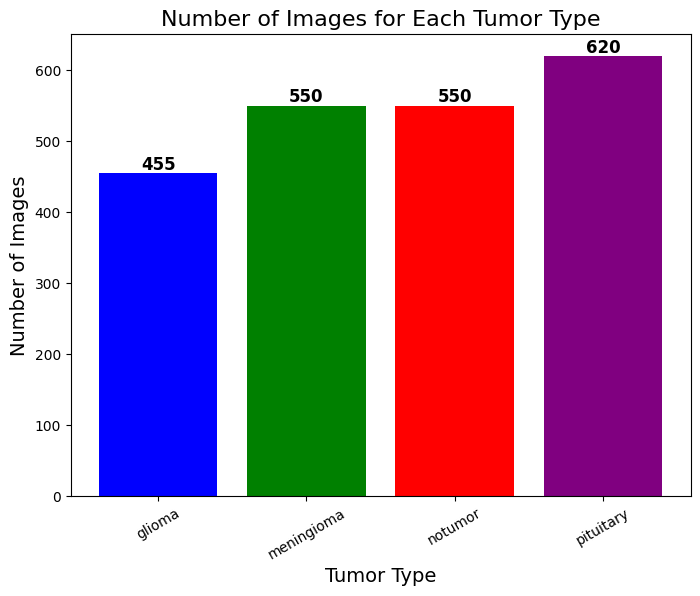

In [4]:
# Plot Bar Graph Using Stored Counts
plt.figure(figsize=(8, 6))
plt.bar(tumor_counts.keys(), tumor_counts.values(), color=['blue', 'green', 'red', 'purple'])

# Labeling
plt.xlabel("Tumor Type", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Number of Images for Each Tumor Type", fontsize=16)
plt.xticks(rotation=30)  # Rotate labels for better visibility

# Show the counts on top of bars
for i, (tumor, count) in enumerate(tumor_counts.items()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


**CNN**

Found 1740 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - accuracy: 0.4771 - loss: 1.1629 - val_accuracy: 0.5862 - val_loss: 0.9309
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7593 - loss: 0.6141 - val_accuracy: 0.6874 - val_loss: 0.8324
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8454 - loss: 0.4496 - val_accuracy: 0.6598 - val_loss: 0.8635
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8392 - loss: 0.4332 - val_accuracy: 0.7172 - val_loss: 0.8107
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9048 - loss: 0.2505 - val_accuracy: 0.7563 - val_loss: 0.8408
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9266 - loss: 0.2082 - val_accuracy: 0.8046 - val_loss: 0.9813
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9373 - loss: 0.1756 - val_accuracy: 0.8092 - val_loss: 1.0226
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9567 - loss: 0.1349 - val_accuracy: 0.8437 - val_loss: 

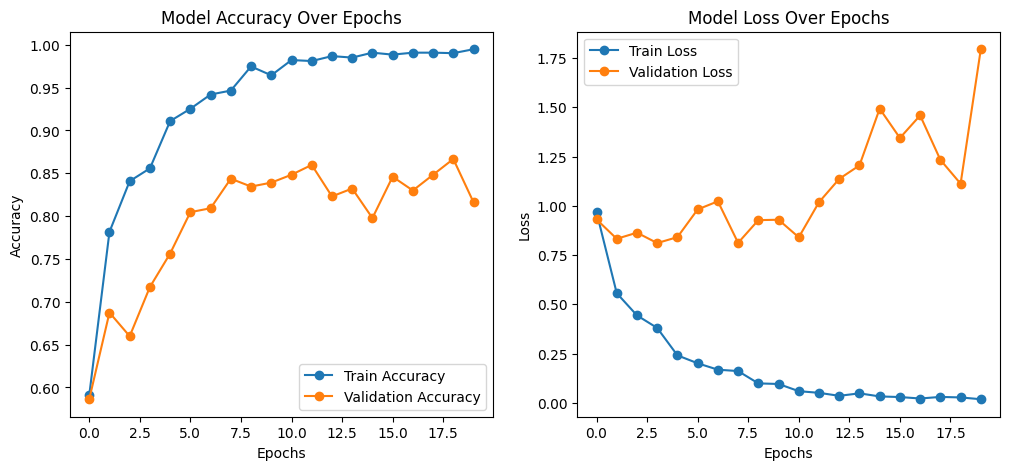

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define dataset directory
dataset_directory = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset"

# Image Preprocessing & Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.2  # 80% Train, 20% Validation
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical', 
    subset='training'
)

# Load Validation Data
val_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Define a 3-Layer CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 Tumor Categories
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train CNN Model for 20 Epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# ✅ Print Final Accuracy
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Accuracy: {val_acc:.2f}%")

# ✅ Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

# Accuracy Graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

# Loss Graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

plt.show()


In [10]:
# ✅ Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,470 (37.82 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,314 (25.22 MB)

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# ✅ Save the trained model
model.save("brain_tumor_cnn_model.h5")
print("Model saved as 'brain_tumor_cnn_model.h5'")

# ✅ Load test data (optional: use a separate 'test' folder)
test_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # using validation again here as test (if test is not available)
    shuffle=False
)

# ✅ Evaluate the model on test/validation data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# ✅ Generate predictions and get classification metrics
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Get class labels
class_labels = list(test_generator.class_indices.keys())

# ✅ Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# ✅ Predict Tumor Type from a Single Image
def predict_tumor_type(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Load model
    model = load_model("brain_tumor_cnn_model.h5")

    # Predict
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Map back to class label
    class_indices = train_generator.class_indices  # get the correct mapping
    class_labels = {v: k for k, v in class_indices.items()}  # reverse mapping
    predicted_label = class_labels[predicted_class_index]

    print(f"Predicted Tumor Type: {predicted_label}")


# ✅ Example usage
predict_tumor_type("//kaggle/input/brain-tumor-dataset/Training/pituitary/Tr-piTr_0002.jpg")


Model saved as 'brain_tumor_cnn_model.h5'
Found 435 images belonging to 4 classes.
 2/14 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5938 - loss: 4.5191

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7701 - loss: 2.2521
Test Accuracy: 80.69%
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.68      0.81        91
  meningioma       0.62      0.90      0.74       110
     notumor       0.97      0.82      0.89       110
   pituitary       0.83      0.81      0.82       124

    accuracy                           0.81       435
   macro avg       0.85      0.80      0.81       435
weighted avg       0.85      0.81      0.81       435

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted Tumor Type: pituitary


**CNN with Bayesian Optimization**

In [ ]:
pip install hyperopt


Found 1740 images belonging to 4 classes.
Found 435 images belonging to 4 classes.
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



100%|██████████| 20/20 [17:44<00:00, 53.25s/trial, best loss: -0.2850574851036072]
Optimized Training Accuracy: 26.26%
Optimized Validation Accuracy: 28.51%


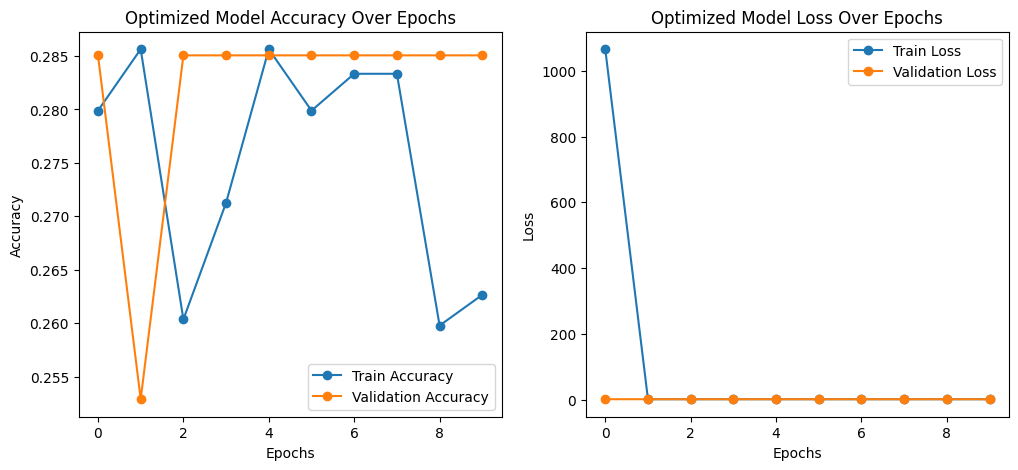

In [11]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define dataset directory
dataset_directory = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset"

# Image Preprocessing & Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Define Hyperparameter Search Space
search_space = {
    'filters1': hp.choice('filters1', [64, 128]),
    'filters2': hp.choice('filters2', [128, 256]),
    'filters3': hp.choice('filters3', [256, 512]),
    'dropout': hp.uniform('dropout', 0.2, 0.4),
    'learning_rate': hp.loguniform('learning_rate', -4, -1)  # 10^(-4) to 10^(-1)
}

# ✅ Define Model Function for Optimization
def build_and_train_model(params):
    model = Sequential([
        Conv2D(params['filters1'], (3,3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2,2),

        Conv2D(params['filters2'], (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(params['filters3'], (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(params['dropout']),
        Dense(4, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=0)
    
    # Get final validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    
    return {'loss': -val_acc, 'status': STATUS_OK, 'model': model, 'history': history}

# ✅ Run Bayesian Optimization
trials = Trials()
best_params = fmin(
    fn=build_and_train_model,
    space=search_space,
    algo=tpe.suggest,
    max_evals=20,  # Increase to 20 trials
    trials=trials
)

# ✅ Train the Best Model for 20 Epochs
best_model_data = trials.best_trial['result']
best_model = best_model_data['model']
best_history = best_model_data['history']

final_train_acc = best_history.history['accuracy'][-1] * 100
final_val_acc = best_history.history['val_accuracy'][-1] * 100
print(f"Optimized Training Accuracy: {final_train_acc:.2f}%")
print(f"Optimized Validation Accuracy: {final_val_acc:.2f}%")

# ✅ Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

# Accuracy Graph
plt.subplot(1,2,1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Model Accuracy Over Epochs')
plt.legend()

# Loss Graph
plt.subplot(1,2,2)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized Model Loss Over Epochs')
plt.legend()

plt.show()


**CNN Training Accuracy with AdamW**

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# ✅ Dataset Path
dataset_directory = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset"
class_labels = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

# ✅ Step 1: Load and Preprocess Images
image_data = []
image_labels = []

for class_name, class_index in class_labels.items():
    class_directory = os.path.join(dataset_directory, class_name)
    image_files = [f for f in os.listdir(class_directory) if f.endswith('.jpg')]

    for image_file in image_files:
        img_path = os.path.join(class_directory, image_file)
        img = load_img(img_path, target_size=(128, 128))  # Resize
        img_array = img_to_array(img) / 255.0  # Normalize
        image_data.append(img_array)
        image_labels.append(class_index)

# ✅ Convert to NumPy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# ✅ One-hot encode labels
image_labels = to_categorical(image_labels, num_classes=4)

# ✅ Step 2: Split into Train & Validation Sets
train_images, val_images, train_labels, val_labels = train_test_split(
    image_data, image_labels, test_size=0.2, random_state=42
)

print(f"✅ Loaded {len(train_images)} training images and {len(val_images)} validation images.")



✅ Loaded 1740 training images and 435 validation images.


Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.5643 - loss: 1.0348 - val_accuracy: 0.3237 - val_loss: 2.5563 - learning_rate: 0.0010
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6786 - loss: 0.8325 - val_accuracy: 0.3237 - val_loss: 4.0751 - learning_rate: 0.0010
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7452 - loss: 0.7047 - val_accuracy: 0.3237 - val_loss: 3.9868 - learning_rate: 0.0010
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7599 - loss: 0.6286 - val_accuracy: 0.3237 - val_loss: 5.4929 - learning_rate: 0.0010
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7942 - loss: 0.5699 - val_accuracy: 0.3237 - val_loss: 6.3125 - learning_rate: 5.0000e-04
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8050 - loss: 0.5259 - val_accuracy: 0.3237 - val_loss: 6.7604 - learning_rate: 5.0000e-04
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7959 - loss: 0.5428 

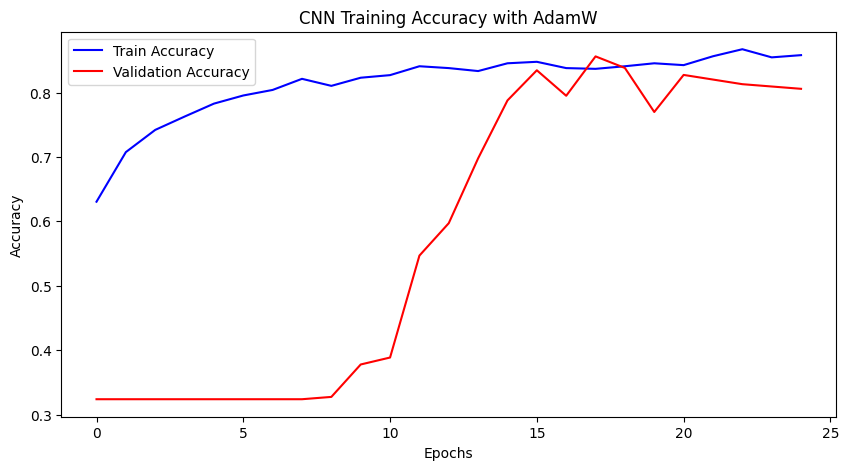

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# ✅ Step 1: Define the CNN Model with AdamW
def build_optimized_cnn():
    model = Sequential([
        Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),  # Instead of Flatten
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')  # 4 Tumor Classes
    ])
    return model

# ✅ Step 2: Compile and Train the Model
model = build_optimized_cnn()
model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=25,  # Increased epochs for better convergence
    batch_size=32,
    callbacks=[lr_scheduler]
)

# ✅ Step 3: Print Final Training & Validation Accuracy
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print(f"🔥 Final Training Accuracy: {final_train_acc:.2f}%")
print(f"🚀 Final Validation Accuracy: {final_val_acc:.2f}%")

# ✅ Step 4: Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Accuracy with AdamW')
plt.show()

model.save("adamw_brain_tumor_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


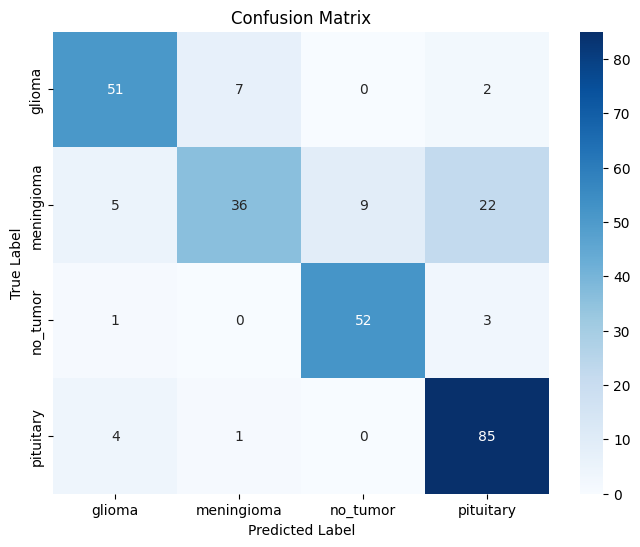

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

# Get predictions and true labels
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(model.predict(val_images), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(class_labels.values())

# Plot and save confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save as image
plt.show()


In [40]:
model.save("adamw_brain_tumor_model.h5")


In [47]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)                   │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 350,598 (1.34 MB)

 Trainable params: 350,084 (1.34 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🔍 Predicted Tumor Type: pituitary
📈 Confidence: 100.00%


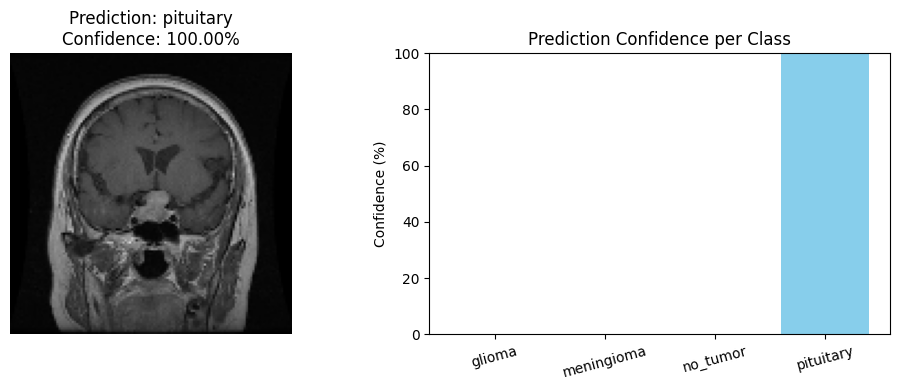

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model("adamw_brain_tumor_model.h5")

# Define class labels
class_labels = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

def predict_image_with_barchart(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class]

    # Print result
    print(f"🔍 Predicted Class: {class_labels[predicted_class]}")
    print(f"🔒 Confidence: {confidence * 100:.2f}%")

    # Plot image and bar chart
    plt.figure(figsize=(12, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence*100:.2f}%)")
    plt.axis('off')

    # Bar chart
    plt.subplot(1, 2, 2)
    bars = plt.bar(class_labels.values(), prediction * 100, color='skyblue')
    bars[predicted_class].set_color('green')  # Highlight the predicted class
    plt.ylabel('Confidence (%)')
    plt.title('Model Confidence for All Classes')
    plt.ylim(0, 100)
    plt.xticks(rotation=15)

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f"{prediction[i]*100:.1f}%", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
predict_image("/kaggle/input/brain-tumor-dataset/Training/pituitary/Tr-piTr_0007.jpg")

**Full CNN + AdamW + class_weight Code**

✅ Loaded 1740 training images and 435 validation images.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.5612 - loss: 0.9972 - val_accuracy: 0.3172 - val_loss: 2.3783 - learning_rate: 0.0010
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7065 - loss: 0.7510 - val_accuracy: 0.3172 - val_loss: 2.9931 - learning_rate: 0.0010
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7396 - loss: 0.6815 - val_accuracy: 0.3172 - val_loss: 4.7785 - learning_rate: 0.0010
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7609 - loss: 0.6002 - val_accuracy: 0.3172 - val_loss: 6.1971 - learning_rate: 0.0010
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8067 - loss: 0.5532 - val_accuracy: 0.3172 - val_loss: 7.7004 - learning_rate: 5.0000e-04
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8218 - loss: 0.4841 - val_accuracy: 0.3172 - val_loss: 8.2080 - learning_rate: 5.0000e-04
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8161 - loss: 0.4975

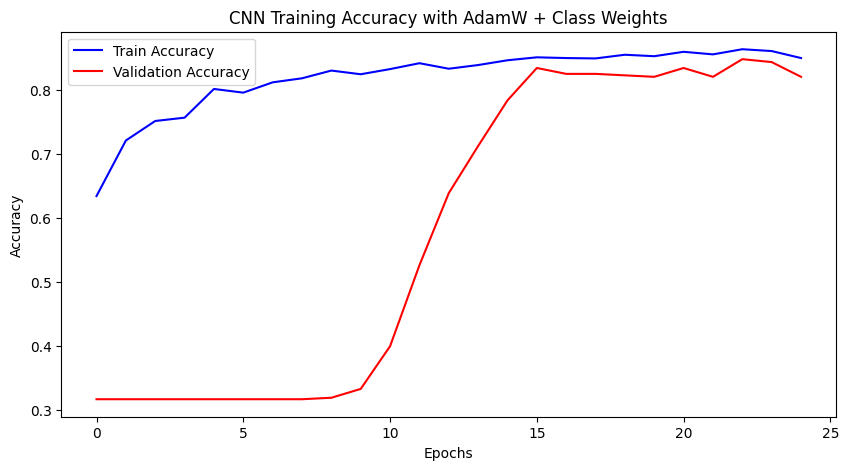

✅ Model saved as 'adamw_brain_tumor_model_weighted.h5'


In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ✅ Dataset Path
dataset_directory = "/kaggle/input/dataset-brain/Brain Tumor labeled dataset"
class_labels = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

# ✅ Step 1: Load and Preprocess Images
image_data = []
image_labels = []

for class_name, class_index in class_labels.items():
    class_dir = os.path.join(dataset_directory, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    for file in image_files:
        img_path = os.path.join(class_dir, file)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        image_data.append(img_array)
        image_labels.append(class_index)

image_data = np.array(image_data)
image_labels = to_categorical(np.array(image_labels), num_classes=4)

# ✅ Step 2: Train-Validation Split
train_images, val_images, train_labels, val_labels = train_test_split(
    image_data, image_labels, test_size=0.2, random_state=42
)

print(f"✅ Loaded {len(train_images)} training images and {len(val_images)} validation images.")

# ✅ Step 3: Define CNN Model with AdamW
def build_optimized_cnn():
    model = Sequential([
        Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# ✅ Step 4: Compute Class Weights
y_train_labels = np.argmax(train_labels, axis=1)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights = dict(enumerate(class_weights))

# ✅ Step 5: Compile and Train the Model
model = build_optimized_cnn()
model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ✅ Step 6: Fit the Model with Class Weights
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=25,
    batch_size=32,
    callbacks=[lr_scheduler],
    class_weight=class_weights
)

# ✅ Step 7: Final Accuracy
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print(f"🔥 Final Training Accuracy: {final_train_acc:.2f}%")
print(f"🚀 Final Validation Accuracy: {final_val_acc:.2f}%")

# ✅ Step 8: Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training Accuracy with AdamW + Class Weights')
plt.legend()
plt.show()

# ✅ Step 9: Save the Model
model.save("adamw_brain_tumor_model_weighted.h5")
print("✅ Model saved as 'adamw_brain_tumor_model_weighted.h5'")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.85      0.92      0.88        96
  meningioma       0.89      0.47      0.61       105
     notumor       0.80      0.92      0.85        96
   pituitary       0.79      0.96      0.87       138

    accuracy                           0.82       435
   macro avg       0.83      0.81      0.80       435
weighted avg       0.83      0.82      0.81       435



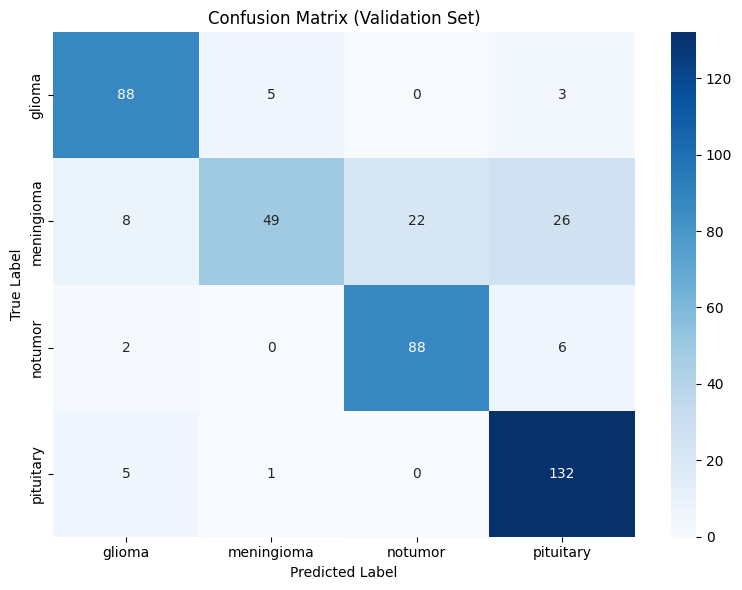

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Step 1: Load Saved Model
model = load_model("adamw_brain_tumor_model_weighted.h5")

# ✅ Step 2: Predict on Validation Set
y_true = np.argmax(val_labels, axis=1)
y_pred_probs = model.predict(val_images)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# ✅ Step 4: Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(class_labels.keys())))

# ✅ Step 5: Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_labels.keys()), yticklabels=list(class_labels.keys()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
✅ Predicted Tumor Type: glioma
✅ Confidence: 78.66%


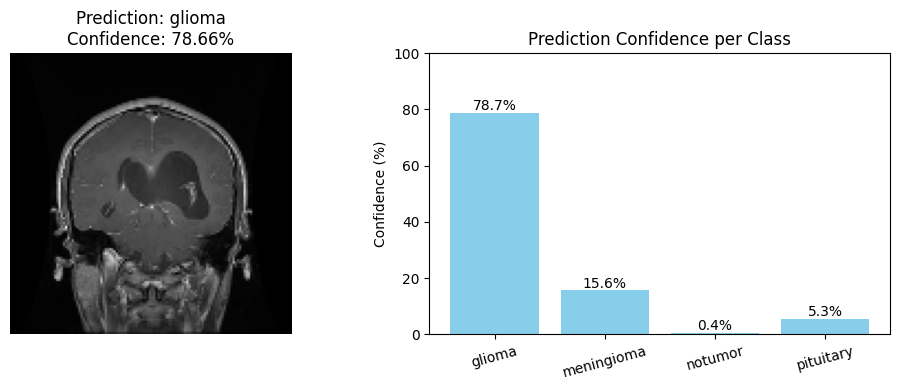

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ✅ Load your trained model
model = load_model("adamw_brain_tumor_model_weighted.h5")

# ✅ Define class labels (make sure they match your model training order)
class_labels = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# ✅ Prediction function
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # normalize
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array_expanded)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class] * 100

    # Print results
    print(f"✅ Predicted Tumor Type: {class_labels[predicted_class]}")
    print(f"✅ Confidence: {confidence:.2f}%")

    # Display image + bar chart
    plt.figure(figsize=(10, 4))

    # Show input image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_labels[predicted_class]}\nConfidence: {confidence:.2f}%", fontsize=12)

    # Show confidence bar chart
    plt.subplot(1, 2, 2)
    plt.bar(class_labels.values(), prediction[0]*100, color='skyblue')
    plt.ylabel("Confidence (%)")
    plt.ylim(0, 100)
    plt.title("Prediction Confidence per Class", fontsize=12)
    plt.xticks(rotation=15)

    # Annotate bars
    for i, val in enumerate(prediction[0]):
        plt.text(i, val * 100 + 1, f"{val * 100:.1f}%", ha='center')

    plt.tight_layout()
    plt.show()
    
# Replace with your own image path
predict_image("/kaggle/input/brain-tumor-dataset/Training/glioma/Tr-glTr_0002.jpg")


**Optimized CNN Training Accuracy with RMSprop**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.5253 - loss: 4.6546 - val_accuracy: 0.3172 - val_loss: 3.3207
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.7098 - loss: 0.9696 - val_accuracy: 0.3172 - val_loss: 5.5242
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.7374 - loss: 0.7701 - val_accuracy: 0.2184 - val_loss: 9.1880
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7604 - loss: 0.7001 - val_accuracy: 0.2138 - val_loss: 10.5803
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7604 - loss: 0.7195 - val_accuracy: 0.2230 - val_loss: 12.4938
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.7454 - loss: 0.6786 - val_accuracy: 0.4184 - val_loss: 8.8240
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8165 - loss: 0.5849 - val_accuracy: 0.2299 - val_loss: 13.6540
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.8156 - loss: 0.5703 - val_accuracy: 0.4782 - val_los

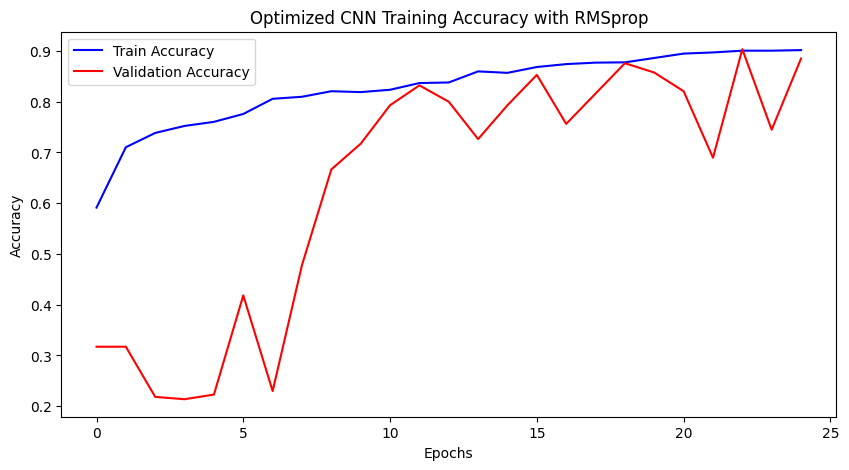

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ✅ Step 1: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# ✅ Step 2: Define Optimized CNN Model
def build_best_cnn():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(512, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),  # Reduce overfitting
        Dense(4, activation='softmax')  # 4 Classes
    ])
    return model

# ✅ Step 3: Compile Model with RMSprop Optimizer
model = build_best_cnn()
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Step 4: Train Model with Data Augmentation
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    validation_data=(val_images, val_labels),
    epochs=25
)

# ✅ Step 5: Print Accuracy
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print(f"🔥 Final Training Accuracy: {final_train_acc:.2f}%")
print(f"🚀 Final Validation Accuracy: {final_val_acc:.2f}%")

# ✅ Step 6: Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Optimized CNN Training Accuracy with RMSprop')
plt.show()


In [6]:
# ✅ Save the trained model
model.save('best_cnn_model.h5')
print("✅ Model saved as 'best_cnn_model.h5'")
model.summary()


✅ Model saved as 'best_cnn_model.h5'


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,667,274 (139.87 MB)

 Trainable params: 18,332,676 (69.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 18,332,678 (69.93 MB)

In [10]:
# ✅ Split Validation Data to Create Test Set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_images_new, test_images, val_labels_new, test_labels = train_test_split(
    val_images, val_labels, test_size=0.2, random_state=42
)

# Update validation set
val_images = val_images_new
val_labels = val_labels_new

# ✅ Load model and evaluate
loaded_model = tf.keras.models.load_model('best_cnn_model.h5')

# Evaluate on test data
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels)
print(f"🧪 Test Accuracy: {test_acc * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - accuracy: 0.9189 - loss: 0.6965
🧪 Test Accuracy: 90.80%


In [11]:
# ✅ Predict classes
y_pred = loaded_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# ✅ Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# ✅ Confusion Matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.63      0.77        19
           2       0.78      0.96      0.86        26
           3       1.00      1.00      1.00        22

    accuracy                           0.91        87
   macro avg       0.93      0.90      0.90        87
weighted avg       0.92      0.91      0.90        87

🧩 Confusion Matrix:
[[20  0  0  0]
 [ 0 12  7  0]
 [ 1  0 25  0]
 [ 0  0  0 22]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
🔍 Predicted Tumor Type: glioma
📈 Confidence: 99.97%


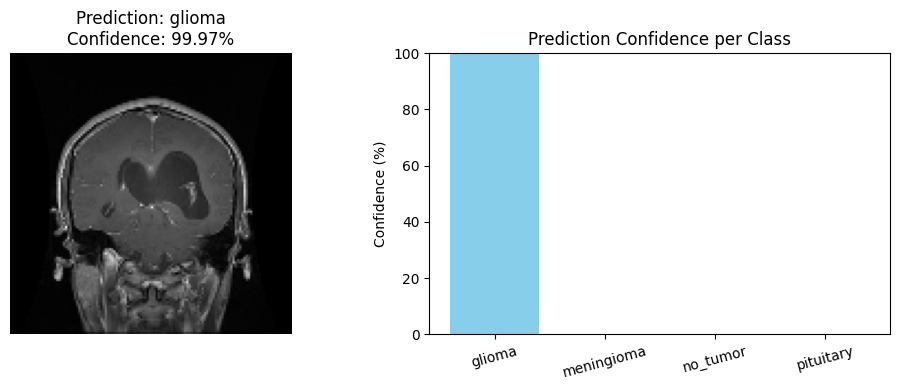

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ✅ Define class names
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

def predict_image(img_path):
    # ✅ Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # ✅ Predict
    prediction = loaded_model.predict(img_array_expanded)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class] * 100

    # ✅ Print results
    print(f"🔍 Predicted Tumor Type: {class_names[predicted_class]}")
    print(f"📈 Confidence: {confidence:.2f}%")

    # ✅ Display image
    plt.figure(figsize=(10, 4))

    # Show input image
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%", fontsize=12)

    # Show confidence bar chart
    plt.subplot(1, 2, 2)
    plt.bar(class_names, prediction[0]*100, color='skyblue')
    plt.ylabel("Confidence (%)")
    plt.ylim(0, 100)
    plt.title("Prediction Confidence per Class", fontsize=12)
    plt.xticks(rotation=15)

    plt.tight_layout()
    plt.show()

predict_image("/kaggle/input/brain-tumor-dataset/Training/glioma/Tr-glTr_0002.jpg")



**Faster R-CNN**

In [3]:
!pip install torchvision
import os
import cv2
import torch
import numpy as np
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [4]:
LABEL_MAP = {
    0: "glioma",
    1: "meningioma",
    2: "Notumor",
    3: "pituitary"
}


In [9]:
class TumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []

        for subdir, _, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg'):
                    self.image_paths.append(os.path.join(subdir, file))

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label_path = img_path.replace('.jpg', '.txt')

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape

        boxes, labels = [], []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    cls, cx, cy, bw, bh = map(float, line.strip().split())
                    x1 = (cx - bw / 2) * w
                    y1 = (cy - bh / 2) * h
                    x2 = (cx + bw / 2) * w
                    y2 = (cy + bh / 2) * h
                    boxes.append([x1, y1, x2, y2])
                    labels.append(int(cls))
        
        if len(boxes) == 0:
            boxes = [[0, 0, 1, 1]]
            labels = [0]  # dummy class if no annotation found

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([idx]),
            "area": (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
            "iscrowd": torch.zeros((len(labels),), dtype=torch.int64)
        }

        if self.transform:
            image = self.transform(image)

        return F.to_tensor(image), target

    def __len__(self):
        return len(self.image_paths)


In [10]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

dataset = TumorDataset('/kaggle/input/dataset-brain/Brain Tumor labeled dataset')  # UPDATE THIS
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 5  # 4 classes + background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 179MB/s]  


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, targets in data_loader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        total_loss += losses.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 140.2761
Epoch 2, Loss: 93.7002
Epoch 3, Loss: 78.7952
Epoch 4, Loss: 68.3880
Epoch 5, Loss: 60.7034


In [12]:
import torch
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Define your classes (including background as index 0)
CLASS_NAMES = ['__background__', 'Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

def detect_tumors(image_path, model, threshold=0.5, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.eval()
    model.to(device)

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.ToTensor()
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(image_tensor)

    # Get detections
    boxes = outputs[0]['boxes'].cpu().numpy()
    scores = outputs[0]['scores'].cpu().numpy()
    labels = outputs[0]['labels'].cpu().numpy()

    # Draw boxes with scores above threshold
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for box, score, label in zip(boxes, scores, labels):
        if score >= threshold:
            draw.rectangle(box.tolist(), outline="red", width=3)
            text = f"{CLASS_NAMES[label]}: {score:.2f}"
            draw.text((box[0], box[1]), text, fill="white", font=font)

    # Show image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Detected Tumors")
    plt.show()


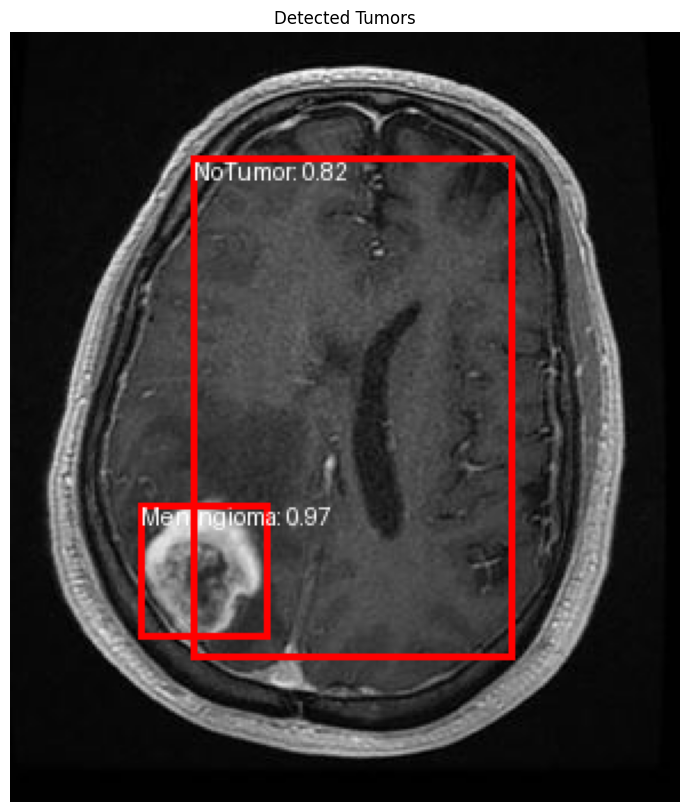

In [20]:
detect_tumors('/kaggle/input/test-image/Y4.JPG', model)
